## Sentiment Analysis

__Dictionary-based sentiment analysis with Python__


- Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.

- Create and save a plot of sentiment over time with a 1-week rolling average

- Create and save a plot of sentiment over time with a 1-month rolling average

- Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot

- Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 
 - What (if any) are the general trends? 
 - What (if any) inferences might you draw from them?

__Libraries__

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import spacy

from spacytextblob.spacytextblob import SpacyTextBlob

In [2]:
# initialise spacy
nlp = spacy.load("en_core_web_sm")
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

__Filepaths__

In [32]:
# Defining the filepath where the data file is located
filepath = os.path.join("..", "..","data", "headlines","abcnews-date-text.csv")

# Defining the filepath were the data is going to be stored
df_path = os.path.join("..", "..","data","headlines", "sentiment_df.csv")

# Defining the subset filepath were the subset data is located
subset_path = os.path.join("..", "..","data","headlines","subset_sentiment_df.csv")

__Data check__

In [4]:
# I use a pandas data frame to get an overview of the data
data_df = pd.read_csv(filepath)

In [5]:
# I use head() look at the data in the data frame  
data_df.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


__Sentiment score__

I recommend that you skip this and go directly to the updated data frame. It is in the following that the sentiment is calculated and it takes about 40 min. I have saved the updated data frame as sentiment_df.csv and attached it. It is from this that the rest of the calculations as well as the overviews are made.

In [12]:
# Create empty list where the sentiment scores will be saved
polarity = []

In [13]:
# Create for loop that loops over all the headlines and calculates the sentiment - don't use the batch_size because it only saves about 2 min for me
for doc in nlp.pipe(data_df["headline_text"]):
    
    # For every sentence calculate sentiment by adding polarity and subjectivity
    for sentence in doc.sents:
        polarity_score = sentence._.sentiment.polarity
        
        # Ad the scores to the lists
        polarity.append(polarity_score)

In [15]:
# Adding the two list, polarity and subjectivity, to coloumns in the data frame


# I could not add the list directly, but when I convert it to series it works
polarity_values = pd.Series(polarity)

#I use pandas insert feature where loc is set to 0 as it is at this position where I want the values to start
data_df.insert(loc=0, column="polarity", value=polarity_values)


In [16]:
# Check the updated data frame
data_df.head(10)

,polarity,publish_date,headline_text
0,0.000,20030219,aba decides against community broadcasting lic...
1,0.250,20030219,act fire witnesses must be aware of defamation
2,0.000,20030219,a g calls for infrastructure protection summit
3,0.000,20030219,air nz staff in aust strike for pay rise
4,0.000,20030219,air nz strike to affect australian travellers
5,0.275,20030219,ambitious olsson wins triple jump
6,0.700,20030219,antic delighted with record breaking barca
7,-0.200,20030219,aussie qualifier stosur wastes four memphis match
8,0.000,20030219,aust addresses un security council over iraq
9,0.000,20030219,australia is locked into war timetable opp


In [17]:
# Save the updated data_df as a csv file
data_df.to_csv(df_path)

__Updated data frame__

In [ ]:
# Read the csv file
sentiment_df = pd.read_csv(df_path) # I have used this file for the calculations

__Creating subset for test__

In [33]:
# The subset contains the two columns polarity and publish_date
subset_sentiment_df = sentiment_df[["polarity","publish_date"]]

# And only the first 10000 rows of the sentiment_df
subset_sentiment_df = subset_sentiment_df[:10000]

# Save the subset as a csv  
subset_sentiment_df.to_csv(subset_path, index=False)

# Read the subset
subset_sentiment_df = pd.read_csv(subset_path) # I recommend you use this file to test

In [34]:
subset_sentiment_df.head()

,polarity,publish_date
0,0.00,20030219
1,0.25,20030219
2,0.00,20030219
3,0.00,20030219
4,0.00,20030219


__1 week average plot__

In [21]:
# I group all the dates so there is one mean value for each date.
day_by_day = sentiment_df.groupby("publish_date")["polarity"].mean()

In [22]:
# Check the grouped values
day_by_day.head(5)

publish_date
20030219    0.005259
20030220    0.017752
20030221    0.006162
20030222    0.025941
20030223    0.001553
Name: polarity, dtype: float64

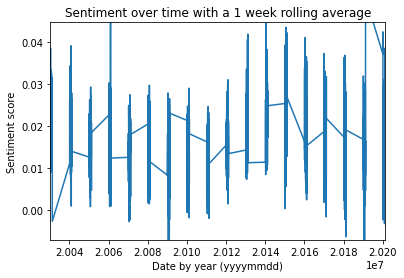

In [23]:
# I now plot the rolling mean at weekly intervals. I do this by making the windowsize 7 (because there is 7 days in a week - mindblown).
plt.plot(day_by_day.rolling(7).mean())

# add title
plt.title("Sentiment over time with a 1 week rolling average")

# add label to x-axis
plt.xlabel("Date by year (yyyymmdd)")

# add label to y-axis
plt.ylabel("Sentiment score")

# I use margins to zoom in. It is not necessary, but I think it fits the data better.  
plt.margins(x=0, y=-0.10)

# show the plot 
plt.show()

__1 month average plot__

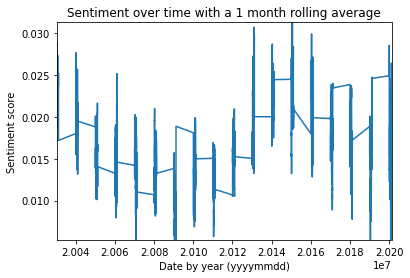

In [16]:
# I now plot the rolling mean at weekly intervals. I do this by making the windowsize 30. 30 days = 1 month-ish
plt.plot(day_by_day.rolling(30).mean())

# add title
plt.title("Sentiment over time with a 1 month rolling average")

# add label to x-axis
plt.xlabel("Date by year (yyyymmdd)")

# add label to y-axis
plt.ylabel("Sentiment score")

# I use margins to zoom in. It is not necessary, but I think it fits the data better.  
plt.margins(x=0, y=-0.10)

# show the plot
plt.show()

__Summary__

Polarity is calculated based on a range between -1 and 1. It is this scale that determines whether the text is polarized or not, where -1 corresponds to a negative statement and 1 corresponds to a positive statement. The reason why the polarity values are so close to zero may be due to some different parameters.

First and foremost, it may be because we work with averages through the calculation. First, we calculated the average for a day based on all the headlines published on the same date. Then we calculated the average for a whole week.

Seen in connection with the fact that the data itself originates from newspaper headlines, there may be a connection between the polarity values being close to 0 and the content. The headlines come from the Australian news source ABC. ABC is owned and funded by the Australian Government and one is therefore inclined to believe that objectivity is weighted higher than clickbait. This means that the headings should be just around 0, which is neutral on the polarity scale, rather than high variation in positive and negative polarization.

Had the data, on the other hand, originated from a more sensation-based source, the results would most likely have looked different.